In [129]:
#Scene Segmentation and Interpretation
#Lab3 : Linear Classification
#Pamir Ghimire, MSCV 2016-2018, UBourgogne


In [130]:
# some useful libraries
%matplotlib inline
%pprint off
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from numpy import linalg


Pretty printing has been turned OFF


In [131]:
# source: http://www.nhsilbert.net/source/2014/06/bivariate-normal-ellipse-plotting-in-python/

def plot_cov_ellipse(cov, pos, volume=.5, ax=None, fc='none', ec=[0,0,0], a=1, lw=2):
    """
    Plots an ellipse enclosing *volume* based on the specified covariance
    matrix (*cov*) and location (*pos*). Additional keyword arguments are passed on to the 
    ellipse patch artist.

    Parameters
    ----------
        cov : The 2x2 covariance matrix to base the ellipse on
        pos : The location of the center of the ellipse. Expects a 2-element
            sequence of [x0, y0].
        volume : The volume inside the ellipse; defaults to 0.5
        ax : The axis that the ellipse will be plotted on. Defaults to the 
            current axis.
    """
    import numpy as np
    from scipy.stats import chi2
    import matplotlib.pyplot as plt
    from matplotlib.patches import Ellipse

    def eigsorted(cov):
        vals, vecs = np.linalg.eigh(cov)
        order = vals.argsort()[::-1]
        return vals[order], vecs[:,order]

    if ax is None:
        ax = plt.gca()

    vals, vecs = eigsorted(cov)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))

    kwrg = {'facecolor':fc, 'edgecolor':ec, 'alpha':a, 'linewidth':lw}

    # Width and height are "full" widths, not radius
    width, height = 2 * np.sqrt(chi2.ppf(volume,2)) * np.sqrt(vals)
    ellip = Ellipse(xy=pos, width=width, height=height, angle=theta, **kwrg)

    ax.add_artist(ellip)

In [132]:
# read the data file 'heightWeightData.txt'
data_mat = np.loadtxt("heightWeightData.txt", delimiter= ",")

# extract rows containing data of males (label = 1)
labels = data_mat[:,0]
idx_male = (labels == 1)

X = data_mat[idx_male,1:3]

# mean of male heights and weights
mean_male = np.mean(X, 0)

# covariance of male height and weight
from numpy.matlib import repmat
X_meanCentered = X - repmat(mean_male, np.size(X, 0), 1)
cov_male = np.cov(X.T)

# Normalization
X_normalized = np.column_stack([X_meanCentered[:,0]*1./cov_male[0,0], X_meanCentered[:,1]*1./cov_male[1,1]]) 
mean_male_normalized = np.mean(X_normalized, 0)
cov_male_normalized = np.cov(X_normalized.T)


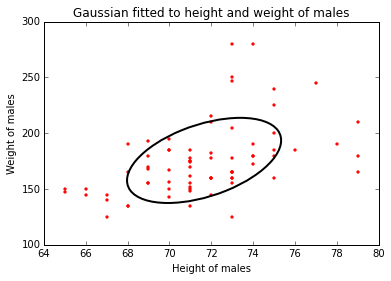

In [141]:
# visualizing male data and gaussians
gaussianSamples = np.random.multivariate_normal(mean_male, cov_male, 1000)

pdata = plt.scatter(X[:,0], X[:,1], color = 'r', marker = '.')
pdatagauss = plot_cov_ellipse(cov_male, mean_male)

plt.xlabel('Height of males')
plt.ylabel('Weight of males')
plt.title('Gaussian fitted to height and weight of males')

plt.show()

In [159]:
# data whitening

# estimate dominant eigenvectors of data
cov_male_centered = np.cov(X_meanCentered.T)
evals, evecs = np.linalg.eigh(cov_male_centered)
order = evals.argsort()[::-1]
evals = evals[order]
evecs = evecs[:,order]

# project data along the dominant eigenvectors 
#(since 2D data, 2D eigenvectors)
X_whitened = np.dot(np.diag(1./evals), np.dot(evecs.T, X_meanCentered.T))
X_whitened = X_whitened.T



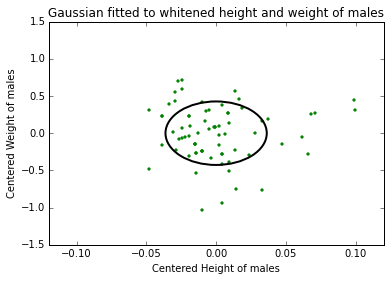

[[  9.50724221e-04  -3.85494106e-19]
 [ -3.85494106e-19   1.31396910e-01]]


In [165]:
# visualizing male data and gaussians after normalization
mean_male_whitened = np.mean(X_whitened, 0)
cov_male_whitened = np.cov(X_whitened.T)

plt.scatter(X_whitened[:,0], X_whitened[:,1], color = 'g', marker = '.')
plot_cov_ellipse(cov_male_whitened, mean_male_whitened)

plt.xlabel('Centered Height of males')
plt.ylabel('Centered Weight of males')
plt.title('Gaussian fitted to whitened height and weight of males')
plt.xlim([-0.12, 0.12])
plt.ylim([-1.5, 1.5])

plt.show()

print cov_male_whitened